C:\Users\nsw26\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

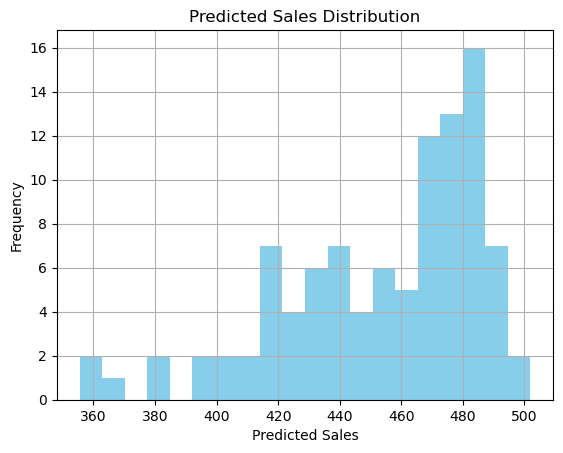

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# Load the csv file into a pandas dataframe
df = pd.read_csv('C:/Users/nsw26/OneDrive/Desktop/nbix2.csv')  # Update 'your_filename.csv' to your actual file name

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Scale the input data to include both 'rx' and 'ASP'
scaler = MinMaxScaler()
scaler.fit(train_data[['rx', 'asp']])  # Fit the scaler to the training data for both features

# Scale the output data
output_scaler = MinMaxScaler()
output_scaler.fit(train_data[['sales']])  # Fit the output scaler to the training data

# Hardcoded next period's Rx and ASP values
next_rx = 87783  # Placeholder for the next period Rx value
next_asp = 5750  # Placeholder for the next period ASP value
scaled_next_inputs = scaler.transform([[next_rx, next_asp]])  # Scale the next period's input values

# Store predictions
predictions = []

# Run the Monte Carlo simulation
for i in range(100):
    # Create the neural network model in each iteration with an adjusted input shape for 2 features
    model = Sequential([
        Input(shape=(2,)),  # Adjusted for two input features
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    # Train the model
    train_scaled_input = scaler.transform(train_data[['rx', 'asp']])
    train_scaled_output = output_scaler.transform(train_data[['sales']])
    model.fit(train_scaled_input, train_scaled_output, epochs=100, batch_size=1, verbose=0)
    
    # Make predictions with the scaled next period's inputs
    scaled_output = model.predict(scaled_next_inputs)
    predicted_sales = output_scaler.inverse_transform(scaled_output)
    
    # Store the prediction
    predictions.append(predicted_sales[0][0])

# Plot the histogram
plt.hist(predictions, bins=20, color='skyblue')
plt.xlabel('Predicted Sales')
plt.ylabel('Frequency')
plt.title('Predicted Sales Distribution')
plt.grid(True)
plt.show()
